In [22]:
from math import sqrt, log2
from Crypto.Util import number
from RSA import *
import numpy as np
import matplotlib.pyplot as plt
import sys, threading
import random
import time

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)

134217728

In [23]:
def Auto_key_generation(n_length = 16):
    p = number.getPrime(n_length // 2)
    q = number.getPrime(n_length // 2)

    while p == q:
        q = number.getPrime(n_length // 2)

    n = p * q
    phi_n = (p - 1) * (q - 1)

    e = number.getPrime(int(log2(phi_n)))
    while GCD(phi_n, e) != 1:
        e = number.getPrime(int(log2(phi_n)))

    d = InvertModulo(e, phi_n)
    
    return e, n, d

# Requirement 3: 
Plot a graph of RSA encryption time vs. Key length.

In [24]:
message = "Hello World"

start = 8
end = 512

key_lengths = np.linspace(start, end, end - start + 1)

keys = []

for key_length in key_lengths:
    e, n, _ = Auto_key_generation(int(key_length))
    keys.append((e, n))

encryption_time = []

for key in keys:
    time_taken = 0
    (e, n) = key
    for _ in range(128):
        start_time = time.time()
        Encrypt(message, n, e)
        end_time = time.time()
        time_taken += end_time - start_time
    encryption_time.append(time_taken / 128)

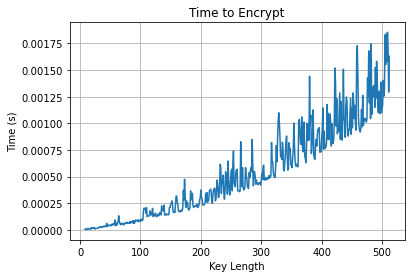

In [25]:
plt.plot(key_lengths, encryption_time)
plt.xlabel("Key Length")
plt.ylabel("Time (s)")
plt.title("Time to Encrypt")
plt.grid()
plt.show()

# Requirement 4:
Plot a graph of Time to break the private key (in seconds) vs. the value of n.

In [26]:
def bruteForce(n):
    p = q = None
    for i in range(2, int(sqrt(n)) + 1):
        if n % i == 0:
            p = i
            q = n // i
            break

    return p, q

In [27]:
start=8
end=56

key_lengths = np.linspace(start, end, end - start)

keys = []

for key_length in key_lengths:
    _, n, _ = Auto_key_generation(int(key_length))
    keys.append(n)

breaking_time = []
for key in keys:
    start_time = time.time()
    bruteForce(key)
    end_time = time.time()
    breaking_time.append(end_time - start_time)

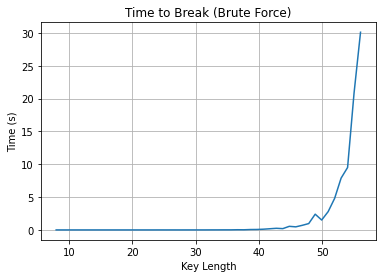

In [28]:
plt.plot(key_lengths, breaking_time)
plt.xlabel("Key Length")
plt.ylabel("Time (s)")
plt.title("Time to Break (Brute Force)")
plt.grid()
plt.show()

# Requirement 5:
Implement the Chosen Cipher Text attack for RSA

In [29]:
# {e, n} --> Bob's public key
# {d, n} --> Bob's private key
e, n, d = Auto_key_generation(512)

# Alice will send bob this message
message = "Hello World!"

# Alice encrypts the message with Bob's public key
cipher = ConvertToInt(Encrypt(message, n, e))

# Eve gets a random number r
r = random.randint(1, n - 1)

# Eve encrypts the random number with Bob's public key and multiples it with the cipher modulo n
cipher_eve = cipher * ConvertToInt(Encrypt(ConvertToStr(r), n, e)) % n

# Bob decrypts the cipher with his private key to get an unknown message
result = ConvertToInt(Decrypt(ConvertToStr(cipher_eve), n, d))

# Eve then will be able to recover the message by multiplying the result with the inverse of r modulo n
recovered_num = (InvertModulo(r, n) * result) % n

recovered_message = ConvertToStr(recovered_num)

print("Recovered message = ", recovered_message)

Recovered message =  Hello World!
